In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_tratado.csv')

# Realizando o treinamento

In [3]:
x = df.drop(columns='Target')
x

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = df['Target']
y

0       Desistente
1         Graduado
2       Desistente
3         Graduado
4         Graduado
           ...    
4419      Graduado
4420    Desistente
4421    Desistente
4422      Graduado
4423      Graduado
Name: Target, Length: 4424, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, stratify=y_split, random_state=42)

In [7]:
print(x_split.shape[0])
print(x_valid.shape[0])
print(x_test.shape[0])

3760
940
664


---

Sem hiperparâmetros

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

In [10]:
print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

0.9975177304964539
0.7851063829787234


Com hiperparâmetros

In [11]:
rfc_model = RandomForestClassifier(random_state=42, max_depth=10)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

0.8929078014184397
0.7914893617021277


# Avaliando o modelo

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

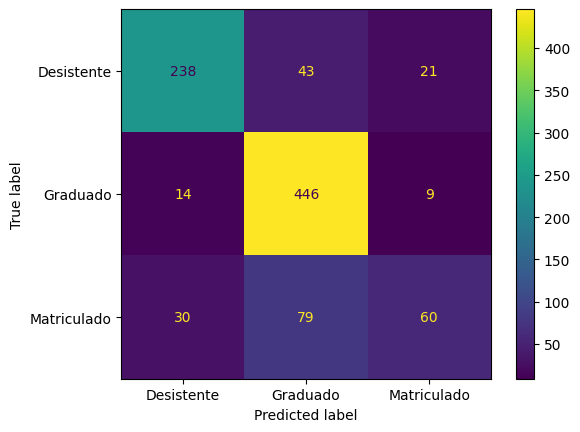

In [13]:
cm_graph = ConfusionMatrixDisplay(confusion_matrix(y_valid, y_predict), display_labels=rfc_model.classes_)
cm_graph.plot();

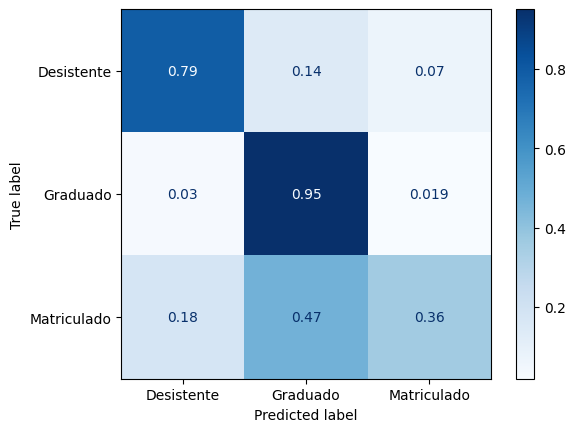

In [14]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict, normalize='true', cmap='Blues')

---

In [15]:
from sklearn.metrics import classification_report

In [16]:
rfc_report = classification_report(y_valid, y_predict)
print(rfc_report)

              precision    recall  f1-score   support

  Desistente       0.84      0.79      0.82       302
    Graduado       0.79      0.95      0.86       469
 Matriculado       0.67      0.36      0.46       169

    accuracy                           0.79       940
   macro avg       0.77      0.70      0.71       940
weighted avg       0.78      0.79      0.77       940



---

Balanceando os dados com over

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
oversample = SMOTE(random_state=42)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [19]:
rfc_model_over = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model.fit(x_train_over, y_train_over)
y_predict_over = rfc_model.predict(x_valid)

              precision    recall  f1-score   support

  Desistente       0.86      0.74      0.80       302
    Graduado       0.83      0.88      0.85       469
 Matriculado       0.53      0.57      0.55       169

    accuracy                           0.78       940
   macro avg       0.74      0.73      0.73       940
weighted avg       0.79      0.78      0.78       940



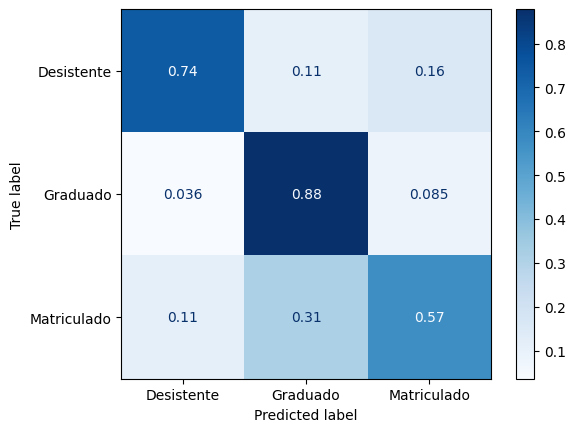

In [20]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_over, normalize='true', cmap='Blues'));
print(classification_report(y_valid, y_predict_over))

### Balanceando os dados com under

In [21]:
from imblearn.under_sampling import NearMiss

In [22]:
undersample = NearMiss(version=1)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

In [23]:
rfc_model_under = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model_under.fit(x_train_under, y_train_under)
y_predict_under = rfc_model_under.predict(x_valid)

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.78       302
    Graduado       0.85      0.60      0.71       469
 Matriculado       0.35      0.73      0.47       169

    accuracy                           0.66       940
   macro avg       0.68      0.68      0.65       940
weighted avg       0.76      0.66      0.69       940



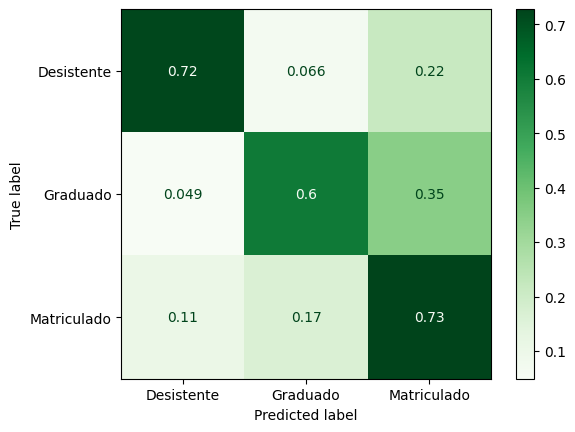

In [24]:
print(ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_under, normalize='true', cmap='Greens'));
print(classification_report(y_valid, y_predict_under))

# Validando o modelo

Random Forest

In [25]:
from imblearn.pipeline import Pipeline as imbpipeline

In [26]:
oversample_pipeline = SMOTE(random_state=42)
rfc_model_over_pipeline = RandomForestClassifier(max_depth=10, random_state=42)

pipeline_rfc = imbpipeline(
    [('oversample', oversample_pipeline), ('floresta', rfc_model_over_pipeline)]
)

In [27]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline_rfc, x_split, y_split, cv=skf, scoring='recall_weighted')

In [29]:
media = cv_resultados['test_score'].mean() * 100
dp = cv_resultados['test_score'].std() * 100

print(f'Intervalo de confiança: [{(media - dp*2):.0f},{(media + dp*2):.0f}]')

Intervalo de confiança: [74,80]


### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
oversample_pipeline = SMOTE(random_state=42)
dtc_model_over_pipeline = DecisionTreeClassifier(max_depth=10, random_state=42)

pipeline_dtc = imbpipeline(
    [('oversample', oversample_pipeline), ('arvore', dtc_model_over_pipeline)]
)

In [32]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados_dtc = cross_validate(pipeline_dtc, x_split, y_split, cv=skf, scoring='recall_weighted')

In [33]:
media = cv_resultados_dtc['test_score'].mean() * 100
dp = cv_resultados_dtc['test_score'].std() * 100

print(f'Intervalo de confiança: [{(media - dp*2):.0f},{(media + dp*2):.0f}]')

Intervalo de confiança: [70,74]


# **Testando o modelo**

In [34]:
oversample_final = SMOTE(random_state=42)
x_train_final, y_train_final = oversample_final.fit_resample(x_split, y_split)

In [42]:
rfc_model_final = RandomForestClassifier(max_depth=10, random_state=42)
rfc_model_final.fit(x_train_final, y_train_final)
y_predict_final = rfc_model_final.predict(x_test)

              precision    recall  f1-score   support

  Desistente       0.86      0.69      0.77       213
    Graduado       0.83      0.87      0.85       332
 Matriculado       0.41      0.50      0.45       119

    accuracy                           0.75       664
   macro avg       0.70      0.69      0.69       664
weighted avg       0.77      0.75      0.75       664



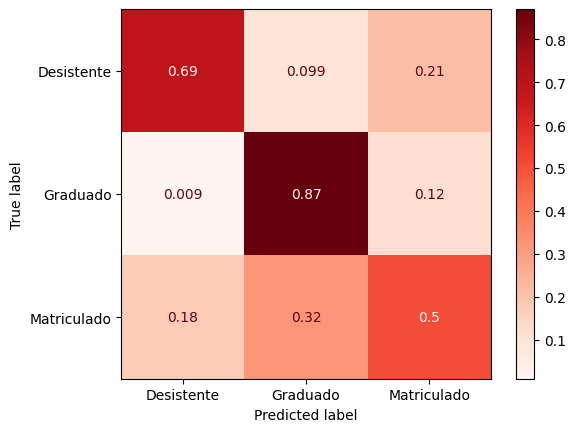

In [44]:
print(classification_report(y_test, y_predict_final))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_predict_final, normalize='true', cmap='Reds'));